In [118]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from ggplot import *

#from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [119]:
#import re

In [120]:
df=pd.read_csv('VIIRS_2012_DIST640Upd.csv')

In [121]:
df.head()

,system:index,DISTRICT,DT_CEN_CD,ST_CEN_CD,ST_NM,avg_rad,censuscode,cf_cvg,.geo
0,00003bd7c3e2c7d7516c,South Andaman,3,35,Andaman & Nicobar Island,375029.795590,640,1.217171e+07,NaN
1,000084ec554a8f8ed361,Nicobar,1,35,Andaman & Nicobar Island,87785.512044,638,6.448612e+06,NaN
2,00009d2c76346cbd9821,North & Middle Andaman,2,35,Andaman & Nicobar Island,93056.695237,639,2.084087e+07,NaN
3,0000fb446706308b4932,Lawangtlai,7,15,Mizoram,326053.190881,287,1.775158e+07,NaN
4,000020d0d5f1113b6a5a,Lunglei,6,15,Mizoram,649239.358299,286,4.061732e+07,NaN


In [122]:
X=df['avg_rad']
#X.shape
X.max()
#X.min()

39992395.33193046

(array([477., 120.,  28.,   9.,   2.,   3.,   1.,   0.,   0.,   1.]),
 array([1.12515715e+04, 4.00936595e+06, 8.00748032e+06, 1.20055947e+07,
        1.60037091e+07, 2.00018235e+07, 2.39999378e+07, 2.79980522e+07,
        3.19961666e+07, 3.59942810e+07, 3.99923953e+07]),
 <a list of 10 Patch objects>)

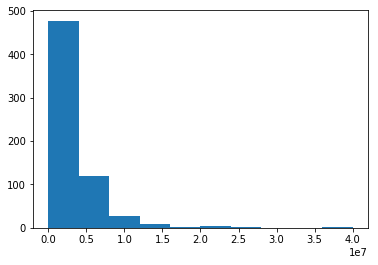

In [105]:
plt.hist(X)


#X1=df.dropna(subset=['Urban and built-up'])

#urban='Urban and built-up'
#X1 = df.drop(df['Urban and built-up']==0)
#X1 = df[df['Urban and built-up'] > 0]

#X1=df[df['Urban and built-up'!=0.0]]
#m=df.drop(df['Urban and built-up'] is 0)


In [177]:
#df_mod=X1

In [123]:
Xreshaped=X.values.reshape(-1,1)
Xreshaped.shape
#Xreshaped

(641, 1)

In [124]:
df['LOG_avg']=np.log(df.avg_rad)

In [125]:
M=df['LOG_avg']

In [126]:
M=M.values.reshape(-1,1)
M.shape

(641, 1)

In [111]:
M.max()

17.504199877302

In [112]:
M.min()

9.328263083125396

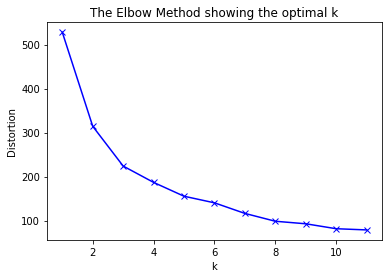

In [127]:
K = range(1,12)

#X.values.reshape(-1,1)
distortions=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(M)
    kmeanModel.fit(M)
    distortions.append(sum(np.min(cdist(M, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))
 #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])   
###Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [132]:
kmeanModel = KMeans(n_clusters=3).fit(M)
df_labels= pd.DataFrame(data={'censuscode':df.censuscode,'DISTRICT':df.DISTRICT, 'LABELS' :kmeanModel.labels_})
#df_labels.groupby('DISTRICT_CDF_Labels_avg_rad').count()

In [129]:
#df_labels

In [133]:
df_labels.groupby('LABELS').size()

LABELS
0    285
1    190
2    166
dtype: int64

In [49]:
df_labels.to_csv('MODIS_DIST_LEVEL_CLUSTERING_3_07_18.csv')


In [134]:
df_labels

,DISTRICT,LABELS,censuscode
0,South Andaman,2,640
1,Nicobar,2,638
2,North & Middle Andaman,2,639
3,Lawangtlai,2,287
4,Lunglei,2,286
5,Saiha,2,288
6,Dibang Valley,2,257
7,Upper Siang,2,252
8,Lower Dibang Valley,2,258
9,Tuensang,2,267


In [93]:
#df_labels[df_labels["LABELS"] == 0]

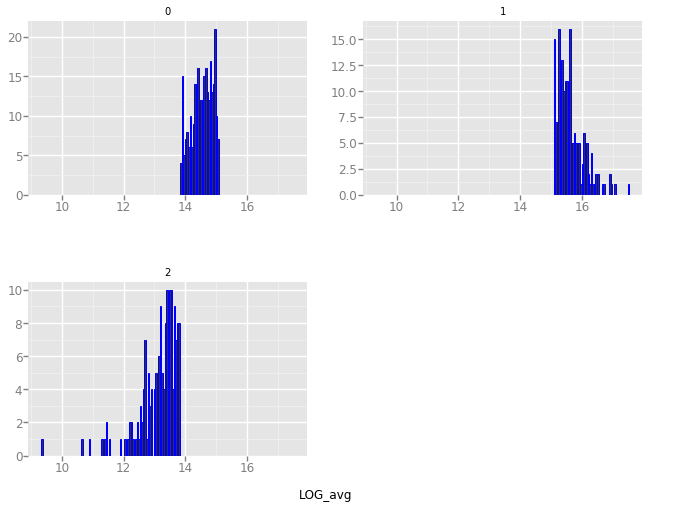

In [139]:
df_cdfVill=df.merge(df_labels, left_on= 'censuscode' ,right_on='censuscode', how='left')

plot= ggplot(df_cdfVill, aes(x='LOG_avg'))+geom_histogram(binwidth=0.05, color='blue')+facet_wrap('LABELS', scales='free_y')

plot
plot.save('VIIRS_2011_BEST.png')

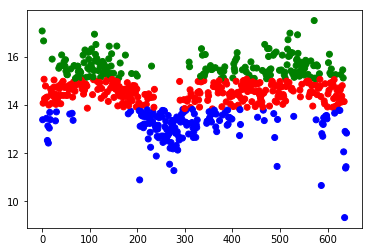

In [140]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 :  'b'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in df_cdfVill['LABELS']]
plt.scatter(df_cdfVill['censuscode'], df_cdfVill['LOG_avg'], c=label_color)
plt.savefig('dist_wise_colorBEST.png')

In [142]:
df_labels.loc[df_labels['LABELS']==0,'LABELS']="1"
df_labels.loc[df_labels['LABELS']==1,'LABELS']="2"
df_labels.loc[df_labels['LABELS']==2,'LABELS']="0"
#df.loc[df_labels['LABELS']==3,'LABELS']="4"
#df.loc[df_labels['LABELS']==4,'LABELS']="3"



In [143]:
df_labels.to_csv('FINAL_VIIRS_CLUSTERS.csv')

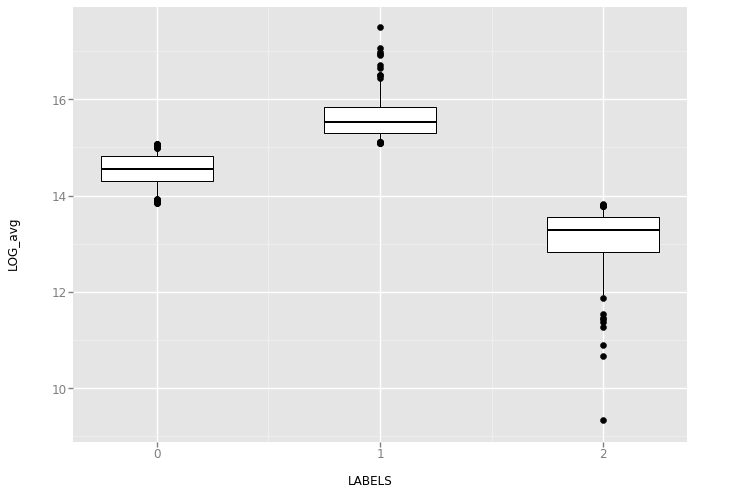

In [141]:
m=ggplot(df_cdfVill, aes(x='LABELS', y='LOG_avg')) + geom_boxplot()#+facet_wrap('LABELS', scales='free_y')
m.save('BOX_plot_VIIRS_logBEST.png')